In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, roc_auc_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

No 1: Introduction to Dataset

In [2]:
url = 'https://github.com/alfredwisana/machine_learning/raw/main/spam.csv'
df = pd.read_csv(url)

No 2: Data Preprocessing

In [3]:
# encoding preprocessing cleaning
df['yesno'] = df['yesno'].replace('y',1)
df['yesno'] = df['yesno'].replace('n',0)
print(df.isnull().sum())
df.head()

crl.tot    0
dollar     0
bang       0
money      0
n000       0
make       0
yesno      0
dtype: int64


,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1


In [4]:
# correlation matrix
df.corr()

,crl.tot,dollar,bang,money,n000,make,yesno
crl.tot,1.000000,0.201948,0.036321,0.080993,0.165977,0.089165,0.249164
dollar,0.201948,1.000000,0.142913,0.104691,0.310971,0.117419,0.323629
bang,0.036321,0.142913,1.000000,0.051076,0.070103,0.058292,0.241888
money,0.080993,0.104691,0.051076,1.000000,0.052587,0.188155,0.216111
n000,0.165977,0.310971,0.070103,0.052587,1.000000,0.134072,0.334787
make,0.089165,0.117419,0.058292,0.188155,0.134072,1.000000,0.126208
yesno,0.249164,0.323629,0.241888,0.216111,0.334787,0.126208,1.000000


In [5]:
df.describe()

,crl.tot,dollar,bang,money,n000,make,yesno
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553,0.394045
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358,0.488698
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000,1.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000,1.000000


In [6]:
df_copy = df.copy(deep=True)

In [7]:
scaler = MinMaxScaler()
df_copy['crl.tot'] = scaler.fit_transform(df_copy[['crl.tot']])
df_copy

,crl.tot,dollar,bang,money,n000,make,yesno
0,0.017487,0.000,0.778,0.00,0.00,0.00,1
1,0.064836,0.180,0.372,0.43,0.43,0.21,1
2,0.142551,0.184,0.276,0.06,1.16,0.06,1
3,0.011995,0.000,0.137,0.00,0.00,0.00,1
4,0.011995,0.000,0.135,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
4596,0.005492,0.000,0.000,0.00,0.00,0.31,0
4597,0.000821,0.000,0.353,0.00,0.00,0.00,0
4598,0.007386,0.000,0.000,0.00,0.00,0.30,0
4599,0.004861,0.000,0.000,0.00,0.00,0.96,0


In [8]:
X = df_copy.drop('yesno', axis=1)
y = df_copy.yesno
#data dipisah menjadi training dan testing
X_temp, X_test, y_temp, y_test = train_test_split(X,y,test_size=0.3,random_state=123)
#data dipisah menjadi trainging dan validation
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=123)

NO. 3: Machine Learning Algorithm Using Logistic Regression

P value Test dengan
alpha = 5% (0.05)

In [9]:
#mencari p value
model_sm = sm.Logit(y_train,X_train)
result = model_sm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.600864
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  yesno   No. Observations:                 2254
Model:                          Logit   Df Residuals:                     2248
Method:                           MLE   Df Model:                            5
Date:                Tue, 17 Oct 2023   Pseudo R-squ.:                  0.1004
Time:                        23:33:39   Log-Likelihood:                -1354.3
converged:                       True   LL-Null:                       -1505.5
Covariance Type:            nonrobust   LLR p-value:                 3.118e-63
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
crl.tot       -4.0250      1.718     -2.343      0.019      -7.392      -0.658
dollar         4.2339      0.695      6.091      0.000       2.871       5.596
bang           0.1137      0.071      1.593      0.111      -0.026       0.254
money          1.6571      0.333      4.974      0.000       1.004       2.310
n000           3.4547      0.568      6.079      0.000       2.341       4.569
make          -0.9044      0.217     -4.167      0.000      -1.330      -0.479
==============================================================================
"""

HO: Predictor tidak memiliki relasi yang signifikan terhadap response
<br>
H1: Predictor memiliki relasi yang signifikan terhadap response

H0 tidak ada relasi kuat antara predictor dan response
<br>
H0 ditolak karena p value <=0.05
<br>
untuk bang kita terima H0

semua attribute penting karena memiliki nilai significant yang kuat

In [10]:
#validasi menggunakan validation set
logistic_regression = LogisticRegression(solver='lbfgs',max_iter=200, random_state=1234)
logistic_regression.fit(X_train,y_train)

y_val_pred = logistic_regression.predict(X_val)
acc_score=accuracy_score(y_val,y_val_pred)
print('accuracy score = %0.2f'%acc_score)

accuracy score = 0.82


In [11]:
#train data
y_train_pred = logistic_regression.predict(X_train)
acc_score=accuracy_score(y_train,y_train_pred)
print('accuracy score = %0.2f'%acc_score)


accuracy score = 0.82


Logistic Regression Graphic

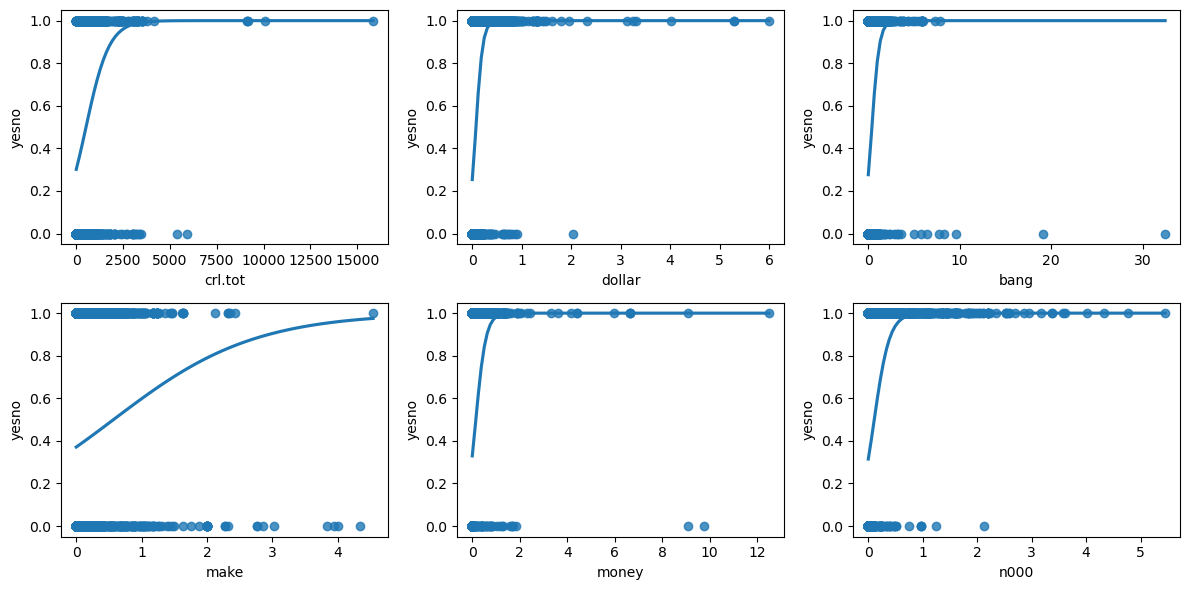

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
sns.regplot(x=df['crl.tot'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,2)
sns.regplot(x=df['dollar'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,3)
sns.regplot(x=df['bang'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,4)
sns.regplot(x=df['make'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,5)
sns.regplot(x=df['money'], y=df['yesno'], logistic=True, ci=None)
plt.subplot(2,3,6)
sns.regplot(x=df['n000'], y=df['yesno'], logistic=True, ci=None)

plt.tight_layout()
plt.show()

CONFOUNDING

CONFUSION MATRIX

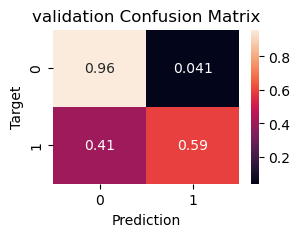

In [13]:
cf = confusion_matrix(y_val, y_val_pred, normalize='true')
plt.figure(figsize=(3,2))
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('validation'));

ROC AUC SCORE

In [14]:
roc_val = roc_auc_score(y_val,y_val_pred)
print('roc_auc_score = %0.2f'%roc_val)
roc_val = round(roc_val,2)

roc_auc_score = 0.78


In [15]:
# Training Data
roc_train = roc_auc_score(y_train,y_train_pred)
print('roc_auc_score = %0.2f'%roc_train)
roc_train = round(roc_train,2)

roc_auc_score = 0.78


In [16]:
if roc_val < roc_train:
    print("The Model is overfit")
elif roc_val > roc_train:
    print("The Model may be underfit")
else:
    print("The Model is neither overfit nor underfit")

The Model is neither overfit nor underfit


NO 4. Resampling Method

VALIDATION SET

In [17]:
mse = mean_squared_error(y_val,y_val_pred)
mse

0.18426501035196688

In [18]:
#Validation Data
y_val_pred = logistic_regression.predict(X_val)
acc_score_val=accuracy_score(y_val,y_val_pred)
print('accuracy score = %0.2f'%acc_score)

accuracy score = 0.82


In [19]:
#Train Data
y_train_pred = logistic_regression.predict(X_train)
acc_score_train=accuracy_score(y_train,y_train_pred)
print('accuracy score = %0.2f'%acc_score)

accuracy score = 0.82


In [20]:
# k-fold cross validation
score = cross_val_score(logistic_regression,X_train,y_train,scoring=None,cv=10)
score_mean=score.mean()
print('Score Mean: %0.2f'%score_mean)

Score Mean: 0.81


In [21]:
from sklearn.metrics import precision_score

KFOLD VALIDATION

In [22]:
#evaluasi menggunakan kfold cross validation
kf = KFold(n_splits=10)
mse_scores = []
fold = 1
for train_index, val_index in kf.split(X_temp):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    logistic_regression.fit(X_train,y_train)
    y_pred = logistic_regression.predict(X_val)
    mse = mean_squared_error(y_val,y_pred)
    mse_scores.append(mse)
    print("="*50)
    print(f"Fold : {fold}")
    print("="*50)
    print("mean squared error %0.2f"%mse)
    print("="*50)
    fold+=1
    
avg_mse = sum(mse_scores)/len(mse_scores)
print("Average MSE Across All Folds:", avg_mse)
print("score:", accuracy_score(y_val,y_pred))

Fold : 1
mean squared error 0.18
Fold : 2
mean squared error 0.24
Fold : 3
mean squared error 0.26
Fold : 4
mean squared error 0.18
Fold : 5
mean squared error 0.23
Fold : 6
mean squared error 0.25
Fold : 7
mean squared error 0.10
Fold : 8
mean squared error 0.12
Fold : 9
mean squared error 0.11
Fold : 10
mean squared error 0.11
Average MSE Across All Folds: 0.1795031055900621
score: 0.8881987577639752


In [23]:
#testing data
y_test_pred = logistic_regression.predict(X_test)
acc=accuracy_score(y_test,y_test_pred)
print("Accuracy: %0.2f"%acc)

Accuracy: 0.85


BIAS VARIANCE TRADE OFF

1. Validation Set (Validasi Set):

Bias: Validation set dapat menghasilkan perkiraan bias yang lebih tinggi daripada K-Fold Cross-Validation. Ini karena Anda hanya mengukur kinerja model pada satu subset data validasi.

Varians: Pengukuran bias yang tinggi pada satu set data validasi bisa mengakibatkan model menjadi overfit pada data tersebut, menghasilkan varians yang tinggi.

2. K-Fold Cross-Validation:

Bias: K-Fold Cross-Validation cenderung memberikan perkiraan bias yang lebih baik karena Anda mengukur kinerja model pada berbagai subset data pengujian yang berbeda.

Varians: Dengan menggunakan lebih banyak data pengujian dalam K-Fold Cross-Validation, model memiliki kesempatan untuk menggeneralis lebih baik, mengurangi risiko overfitting, dan menghasilkan varians yang lebih rendah.

NO. 5: Pemilihan Model dan metode memperbaiki model

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gaussianNB = GaussianNB()

In [26]:
gaussianNB.fit(X_train,y_train)
gaussianNB_y_pred_val = gaussianNB.predict(X_val)

In [27]:
gaussianNB_acc_score = accuracy_score(y_val,gaussianNB_y_pred_val)
gaussianNB_acc_score

0.9627329192546584

In [28]:
gaussianNB_y_pred_test = gaussianNB.predict(X_test)

In [29]:
gaussianNB_acc_score_test = accuracy_score(y_test,gaussianNB_y_pred_test)
gaussianNB_acc_score_test

0.8247646632874729

Untuk model naive bayes untuk prediction lbh baik dibandingkan logistic regression
<br>
namun untuk score antara model dan test bisa jadi underfiting

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

In [31]:
LDA = LinearDiscriminantAnalysis()

In [32]:
LDA.fit(X_train,y_train)
LDA_y_pred_val = LDA.predict(X_val)

In [33]:
LDA_acc_score = accuracy_score(y_val,LDA_y_pred_val)
LDA_acc_score

0.7981366459627329

In [34]:
LDA_y_pred_test = LDA.predict(X_test)

In [35]:
LDA_acc_score_test = accuracy_score(y_test,LDA_y_pred_test)
LDA_acc_score_test

0.832729905865315

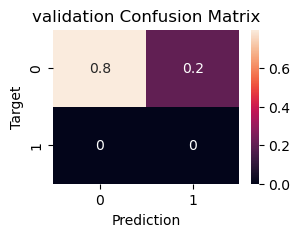

In [36]:
cf = confusion_matrix(y_val, LDA_y_pred_val, normalize='true')
plt.figure(figsize=(3,2))
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('validation'));

Untuk model LDA untuk prediction lbh jelek dibandingkan logistic regression
<br>
namun untuk score antara model dan tes overfit

In [37]:
QDA = QuadraticDiscriminantAnalysis()

In [38]:
QDA.fit(X_train,y_train)
QDA_y_pred_val = QDA.predict(X_val)

In [39]:
QDA_acc_score = accuracy_score(y_val,QDA_y_pred_val)
QDA_acc_score

0.9658385093167702

In [40]:
QDA_y_pred_test = QDA.predict(X_test)

In [41]:
QDA_acc_score_test = accuracy_score(y_test,QDA_y_pred_test)
QDA_acc_score_test

0.832005792903693

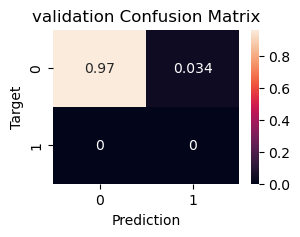

In [42]:
cf = confusion_matrix(y_val, QDA_y_pred_val, normalize='true')
plt.figure(figsize=(3,2))
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format('validation'));